In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import savReaderWriter

%matplotlib notebook

In [114]:
#Pre-Processing 2014

with savReaderWriter.SavReader(r'C:\Users\jefft\Downloads\Pew-Research-Center-2014-U.S.-Religious-Landscape-Study\Dataset - Pew Research Center 2014 Religious Landscape Study National Telephone Survey - Version 1.1 - December 1 2016.sav', ioUtf8 = True) as reader:
   df14 = pd.DataFrame(reader.all(), columns = [s for s in reader.header])

keep_cols14 = ['resp','state','attend','qg1','qg1b']

df14=df14[keep_cols14]
df14=df14[df14.state==53] #WA data
df14['year'] = 2014
df14.loc[(df14['attend']==1.0)|(df14['attend']==2.0),'2014'] = 'At least once a week'
df14.loc[(df14['attend']==3.0)|(df14['attend']==4.0),'2014'] = 'Once or twice a month/a few times a year'
df14.loc[(df14['attend']==5.0)|(df14['attend']==6.0),'2014'] = 'Seldom/never'
df14.loc[(df14['attend']==9.0),'2014'] = 'Unknown'
df14=df14.fillna(0)


In [115]:
with savReaderWriter.SavReader(r'C:\Users\jefft\Downloads\dataset_Religious_Landscape_Survey_Data\Religious Landscape Survey Data - Continental US.sav', ioUtf8 = True) as reader:
   df07 = pd.DataFrame(reader.all(), columns = [s for s in reader.header])

keep_cols07 = ['psraid','state','q20','q30','q31']
df07=df07[keep_cols07]
df07=df07[df07.state==53] #WA data
df07=df07.rename(columns={"q20": "attend","psraid":"resp"})
df07['year']=2007
df07.loc[(df07['attend']==1.0)|(df07['attend']==2.0),'2007'] = 'At least once a week'
df07.loc[(df07['attend']==3.0)|(df07['attend']==4.0),'2007'] = 'Once or twice a month/a few times a year'
df07.loc[(df07['attend']==5.0)|(df07['attend']==6.0),'2007'] = 'Seldom/never'
df07.loc[(df07['attend']==9.0),'2007'] = 'Unknown'
df07=df07.fillna(0)

In [116]:
df14percent=df14['2014'].value_counts(normalize=True)*100
df07percent=df07['2007'].value_counts(normalize=True)*100

df14percent=df14percent.sort_index(ascending=False)
df07percent=df07percent.sort_index(ascending=False)
dffinal=pd.concat([df14percent,df07percent])

<IPython.core.display.Javascript object>


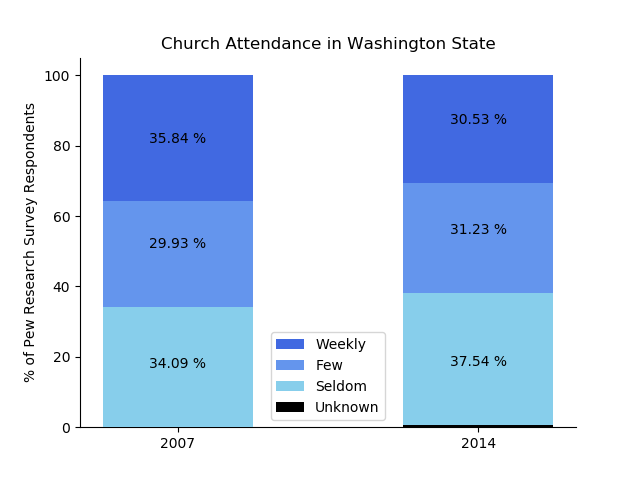

In [180]:
Year=['2007','2014']
Weekly=np.array([df07percent['At least once a week'],df14percent['At least once a week']])
Few=np.array([df07percent['Once or twice a month/a few times a year'],df14percent['Once or twice a month/a few times a year']])
Seldom=np.array([df07percent['Seldom/never'],df14percent['Seldom/never']])
Unknown=np.array([df07percent['Unknown'],df14percent['Unknown']])
ind = [x for x, _ in enumerate(Year)]

fig, ax = plt.subplots()

#plt.grid(color='darkgray', axis='y', zorder=0)

#sns.palplot(sns.color_palette("RdYlGn", 10))
rects1=plt.bar(ind, Weekly, width=0.5, label='Weekly', color='royalblue', bottom=Unknown+Seldom+Few, zorder=3)
rects2=plt.bar(ind, Few, width=0.5, label='Few', color='cornflowerblue', bottom=Unknown+Seldom, zorder=3)
rects3=plt.bar(ind, Seldom, width=0.5, label='Seldom', color='skyblue', bottom=Unknown, zorder=3)
rects4=plt.bar(ind, Unknown, width=0.5, label='Unknown', color='black', zorder=3)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f} %'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, rect.get_y()),
                    xytext=(0, 40),  # 40 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.legend(loc='best')
plt.xticks(ind, Year)
sns.despine(right=True)
plt.title('Church Attendance in Washington State')
plt.ylabel('% of Pew Research Survey Respondents', fontsize=10)
plt.show()